In [16]:
#Importing libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import scipy
import pylab as pl
import scipy.stats
from scipy import stats
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import statsmodels.formula.api as smf
%matplotlib inline
from random import shuffle


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [17]:
#naming colors
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

In [18]:
#Data of crimes per precinct
data = pd.read_csv('DataCrime_Correlation.csv', index_col=0 )
data.shape

(77, 13)

In [19]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,CrimeNorm
Precinct,,,,,,,,,,,,,
1,0.211683,38.067880,0.740265,13.863884,0.547153,0.313808,0.209205,0.016093,30.270420,2.019637,2.389770,50.595534,26.190913
5,0.789065,49.511993,2.082993,20.724902,0.901463,0.665157,0.612645,0.078769,64.844088,4.341027,3.001960,97.673104,19.569629
6,0.173287,45.540829,1.173975,12.220750,0.448393,0.326104,0.334257,0.032610,40.110799,3.888791,2.290881,61.152664,25.501337
7,1.389044,38.652367,1.034483,7.844213,0.401886,0.282808,0.327462,0.052096,28.608306,1.123791,0.878195,40.687202,12.778476
9,3.277879,107.295043,2.554610,19.432394,0.917675,0.694457,0.731660,0.099208,77.754378,4.774392,2.641417,110.021824,37.934712


In [60]:
#Sort the data randomly to create two sets, one for make a model and the other to measure the model.
data = data.iloc[np.random.permutation(len(data))]
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,CrimeNorm
Precinct,,,,,,,,,,,,,
72,9.858698,176.763214,4.135224,141.322828,8.008139,0.432038,0.586338,0.200589,51.906321,1.404125,2.437931,210.927291,38.420553
66,19.067290,193.670990,8.760252,342.817873,18.342454,0.821950,1.232924,0.346084,90.674019,2.595630,4.174639,470.674295,51.696304
101,1.426306,18.654570,0.796104,2.371373,1.987436,0.045169,0.011292,0.005646,1.140517,0.084692,0.033877,6.487399,11.049469
47,17.887458,310.484096,7.441224,112.327043,12.905581,0.279745,0.634089,0.093248,40.581711,0.540841,1.659822,176.910896,77.601332
108,5.539843,143.186726,5.988184,153.874931,11.808331,0.366623,1.267906,0.152760,56.979400,2.092809,1.787289,235.158413,39.228713


In [20]:

(N,n)=data.shape

N,n


(77, 13)

In [7]:
#DropOut Rate Normalized by Population per precint	X1
#Unemployed Rate normilized by population in labor force	X2
#Animal Abuse 	X3
#Blocked Driveway, Traffic Illegal and Parking	X4
#Derelict Vehicle	X5
#Disorderly Youth, Graffiti, BikeRoller Skate Chronic	X6
#Drinking	X7
#Illegal_Fireworks	X8
#Noise	X9
#Panhandling_Homeless_Encampment	X10
#Vending	X11
#311totalComplaints	X12

In [21]:
n=n-1
train1 = data[:][0:((N/2)-1)]
valid1 = data[:][(N/2):(N-1)]
valid1.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,CrimeNorm
Precinct,,,,,,,,,,,,,
66,19.067290,193.670990,8.760252,342.817873,18.342454,0.821950,1.232924,0.346084,90.674019,2.595630,4.174639,470.674295,51.696304
67,13.249839,242.047848,9.767597,198.027033,23.354237,0.580776,0.668772,0.246390,76.028865,1.531137,0.985559,311.771143,79.865506
68,5.683207,100.572043,2.713265,101.638922,4.802480,0.135663,0.447689,0.284893,26.074481,0.515520,1.817888,138.715694,27.716006
69,4.409788,61.645026,4.585561,82.540105,11.264118,0.180759,0.361517,0.114163,22.756562,0.713521,0.304436,123.058582,21.243898
70,17.810406,262.121422,9.728555,267.636611,18.930147,0.912052,0.689106,0.081071,90.597172,1.965979,1.661962,393.094439,79.753886


In [22]:
#Using Funcion "regress" 
def regress(mask):
    formstr='CrimeNorm~-1'
    for i in range(0,len(mask)):
        if mask[i] == 1:
            formstr = formstr + '+X' + str(i + 1)
    lm = smf.ols(formula=formstr, data = train1).fit()
    lmy2 = lm.predict(valid1)
    R2=1 - sum(pow(lmy2 - valid1.CrimeNorm, 2)) / sum(pow(valid1.CrimeNorm - mean(valid1.CrimeNorm), 2))
    p1 = sum(mask)
    n1 = len(valid1)
    firstpart = (1-R2)
    secondpart = (n1-p1-1.0)
    #print p1/ secondpart
    takeout = firstpart * (p1 / secondpart)
    AR2 = R2 - firstpart * takeout
    #print "R2 = %s, Adjusted R2 = %s, n = %s, p = %s, tout = %s, fp = %s, sp = %s" % (R2, AR2, n1, p1,takeout,firstpart,secondpart)
    return (AR2,formstr)



In [24]:

#Now we make inverse procedure, instead of forward make it backward
n = 12
mask0 = [1] * n #initially all of the regressors are included (creates a one array)
r12 = regress(mask0)[0] #initially regression with all
print "The initial regression is %s" % (r12)
while True:
    bestI = -1 #best regressor to exclude
    for i in range(0,n):
        if (mask0[i] == 1):
            mask = mask0[:]
            mask[i] = 0
            r2 = regress(mask)[0]
            if (r2 > r12):
                r12 = r2
                bestI = i
    if (bestI >= 0):
        mask0[bestI] = 0
        print 'Taking out X%s, the regression is better %s' % (bestI+1,r12)
    else:
        break
(r2,str1)= regress(mask0)
lm = smf.ols(formula = str1, data = valid1).fit()
lmy = lm.predict()
print r2
lm.summary()

The initial regression is 0.28366770254
Taking out X8, the regression is better 0.735698118966
Taking out X10, the regression is better 0.745390111213
0.745390111213


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CrimeNorm   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     51.82
Date:                Tue, 15 Dec 2015   Prob (F-statistic):           2.18e-15
Time:                        01:45:35   Log-Likelihood:                -151.24
No. Observations:                  38   AIC:                             322.5
Df Residuals:                      28   BIC:                             338.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X1             1.8617      0.608      3.063      0.005         0.617     3.107
X2             0.1388      0.064      2.163      0.039         0.007     0.270
X3             3.4381      8.753      0.393      0.697       -14.492    21.368
X4             0.2027      7.978      0.025      0.980       -16.139    16.544
X5             0.2357      8.086      0.029      0.977       -16.327    16.799
X6           -10.1370     21.142     -0.479      0.635       -53.444    33.170
X7            -6.9781     15.798     -0.442      0.662       -39.339    25.383
X9             0.1255      8.096      0.015      0.988       -16.459    16.710
X11            1.5881     13.054      0.122      0.904       -25.152    28.328
X12           -0.2066      7.972     -0.026      0.980       -16.537    16.124
==============================================================================
Omnibus:                        7.491   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                7.135
Skew:                           0.647   Prob(JB):                       0.0282
Kurtosis:                       4.683   Cond. No.                     3.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
len(data.CrimeNorm)

77

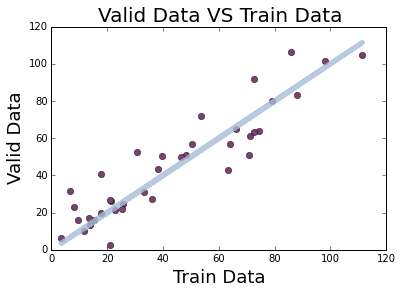

In [12]:

plt.plot(lmy,valid1.CrimeNorm,'or',linewidth=5,alpha=1.0,c=kelly_colors_hex[1])
plt.plot(lmy,lmy,'-b',linewidth=5,alpha=0.8,c=kelly_colors_hex[3])
plt.title('Valid Data VS Train Data',fontsize=20)
plt.xlabel('Train Data',fontsize=18)
plt.ylabel('Valid Data',fontsize=18)
#plt.xscale('log')
#plt.yscale('log')
#lm = smf.ols(formula = str1, data = valid1).fit()

In [103]:
crime_correlation = []
formstr=''
for i in range(1,13):
    formstr ='X' + str(i)
    pr = scipy.stats.pearsonr(data[formstr], data['CrimeNorm'])
    print formstr,pr

X1 (0.71369827402173003, 3.2181586290079372e-13)
X2 (0.82474972339379748, 2.9946901442061772e-20)
X3 (0.74497243160624382, 7.95237296942606e-15)
X4 (0.63326207440169335, 6.4011355336111015e-10)
X5 (0.55654797659306232, 1.4740584556986782e-07)
X6 (0.055942414316575942, 0.62892378252634262)
X7 (0.65060756970764244, 1.5071729467908762e-10)
X8 (0.54192325552656295, 3.5801298545643582e-07)
X9 (0.3843464767089001, 0.00055844841216215913)
X10 (0.1211377993776749, 0.29396457878553955)
X11 (0.115938180774041, 0.31532837168888994)
X12 (0.65467926473889781, 1.0588263036873779e-10)
